In [1]:
import numpy as np
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt

# Read Dataset and split test & training data

In [2]:
network_properties_df = pd.read_csv('datasets/note2vec_with_rating.csv', escapechar='\\')
network_properties_df = network_properties_df.dropna(axis = 0)
network_properties = network_properties_df.drop(columns=['tconst']).values
headers = list(network_properties_df.drop(columns=['tconst', 'averageRating']).columns.values)
y = network_properties[:,0]
x = network_properties[:,1:]
test_number = 171
n_fold = 10 # For cross-validation
samples_per_fold = 60 # For cross-validation
y_test = y[:test_number]
y_train = y[test_number:]
x_test = x[:test_number]
x_train = x[test_number:]

In [3]:
scaling = preprocessing.MinMaxScaler(feature_range=(-1,1)).fit(x_train)
x_train = scaling.transform(x_train)
x_test = scaling.transform(x_test)

In [4]:
mse = lambda prediction, y_test:np.mean(np.square(prediction - y_test))

In [5]:
# Shape check
y_test.shape, x_test.shape, y_train.shape, x_train.shape

((171,), (171, 118), (600,), (600, 118))

# Lasso regression on Graph properties

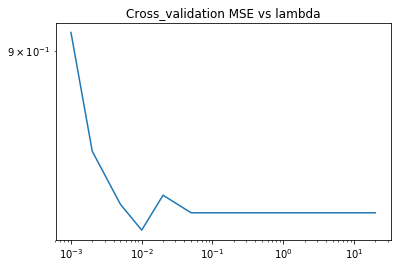

0.01

In [21]:
# Cross validation for lasso
alphas = [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20]
mse_cross_validation_accuracy = []
for alpha in alphas:
    accurs = []
    for i in range(n_fold):
        test_index = range(i*samples_per_fold, (i+1)*samples_per_fold)
        train_index = range(i*samples_per_fold) + range((i+1)*samples_per_fold, n_fold*samples_per_fold)
        this_x_test = x_train[test_index]
        this_y_test = y_train[test_index]
        lasso_clf = linear_model.Lasso(alpha=alpha)
        lasso_clf.fit(x_train[train_index], y_train[train_index])
        this_pred = lasso_clf.predict(x_train[test_index])
        accurs.append(mse(this_pred, y_train[test_index]))
    mse_cross_validation_accuracy.append(np.mean(accurs))
plt.loglog(alphas, mse_cross_validation_accuracy)
plt.title("Cross_validation MSE vs lambda")
plt.show()
min_alpha = alphas[np.argmin(mse_cross_validation_accuracy)]
min_alpha

In [22]:
mse_cross_validation_accuracy

[0.9045450212936821,
 0.8753848294600353,
 0.8626710561251564,
 0.8565466525840136,
 0.8648254191631579,
 0.8606505589849108,
 0.8606505589849108,
 0.8606505589849108,
 0.8606505589849108,
 0.8606505589849108,
 0.8606505589849108,
 0.8606505589849108,
 0.8606505589849108,
 0.8606505589849108]

In [23]:
lasso_clf = linear_model.Lasso(alpha=0.01)
lasso_clf.fit(x_train, y_train)
prediction = lasso_clf.predict(x_test)
mse_error = mse(prediction,y_test)
mse_error

1.0342345862178757

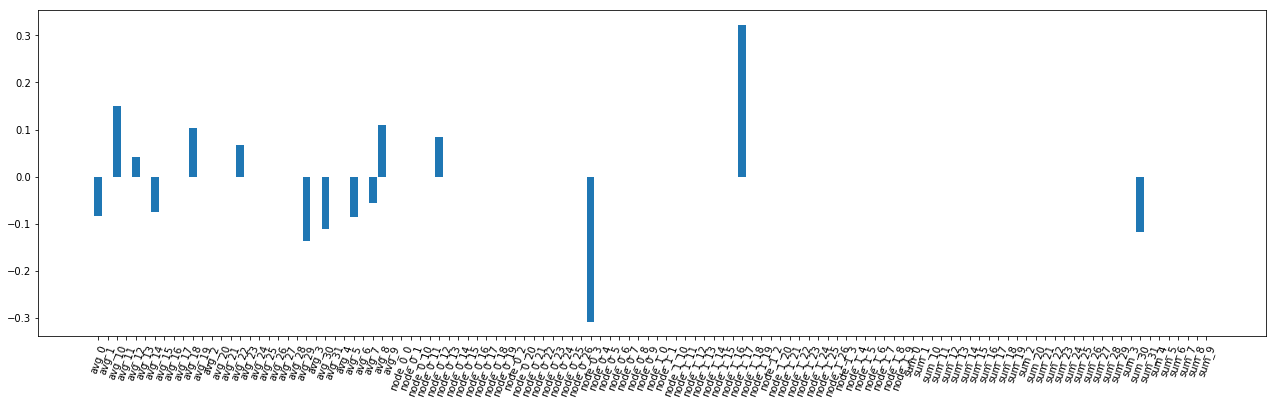

In [24]:
plt.figure(figsize=(22,6))
plt.bar(headers, lasso_clf.coef_)
plt.tick_params(axis='x', rotation=70)
plt.show()

In [188]:
len(lasso_clf.coef_), len(headers)

(17, 17)

# Ridge regression on Graph properties

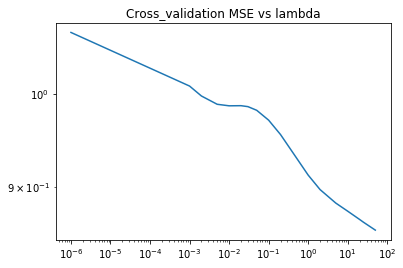

50

In [15]:
# Cross validation for ridge
alphas = [0.000001, 0.001, 0.002, 0.005, 0.01, 0.02, 0.03, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 25, 50]
mse_cross_validation_accuracy = []
for alpha in alphas:
    accurs = []
    for i in range(n_fold):
        test_index = range(i*samples_per_fold, (i+1)*samples_per_fold)
        train_index = range(i*samples_per_fold) + range((i+1)*samples_per_fold, n_fold*samples_per_fold)
        this_x_test = x_train[test_index]
        this_y_test = y_train[test_index]
        ridge_clf = linear_model.Ridge(alpha=alpha)
        ridge_clf.fit(x_train[train_index], y_train[train_index])
        this_pred = ridge_clf.predict(x_train[test_index])
        accurs.append(mse(this_pred, y_train[test_index]))
    mse_cross_validation_accuracy.append(np.mean(accurs))
plt.loglog(alphas, mse_cross_validation_accuracy)
plt.title("Cross_validation MSE vs lambda")
plt.show()
min_alpha = alphas[np.argmin(mse_cross_validation_accuracy)]
min_alpha

In [17]:
mse_cross_validation_accuracy

[1.071778310759202,
 1.0086881090409712,
 0.9973893285427315,
 0.9880989844235302,
 0.986392789859108,
 0.9865306468790921,
 0.9854607902527664,
 0.9813954532318458,
 0.9705213569700468,
 0.9548388069487027,
 0.9302548335649712,
 0.9120352717038893,
 0.8971947242609793,
 0.8835883020790696,
 0.875522467138666,
 0.8673691558733234,
 0.8646815331819369,
 0.8569534143778516]

In [18]:
ridge_clf = linear_model.Lasso(alpha=25)
ridge_clf.fit(x_train, y_train)
prediction = ridge_clf.predict(x_test)
mse_error = mse(prediction,y_test)
mse_error

1.0167638484405443

In [19]:
prediction

array([6.85983333, 6.85983333, 6.85983333, 6.85983333, 6.85983333,
       6.85983333, 6.85983333, 6.85983333, 6.85983333, 6.85983333,
       6.85983333, 6.85983333, 6.85983333, 6.85983333, 6.85983333,
       6.85983333, 6.85983333, 6.85983333, 6.85983333, 6.85983333,
       6.85983333, 6.85983333, 6.85983333, 6.85983333, 6.85983333,
       6.85983333, 6.85983333, 6.85983333, 6.85983333, 6.85983333,
       6.85983333, 6.85983333, 6.85983333, 6.85983333, 6.85983333,
       6.85983333, 6.85983333, 6.85983333, 6.85983333, 6.85983333,
       6.85983333, 6.85983333, 6.85983333, 6.85983333, 6.85983333,
       6.85983333, 6.85983333, 6.85983333, 6.85983333, 6.85983333,
       6.85983333, 6.85983333, 6.85983333, 6.85983333, 6.85983333,
       6.85983333, 6.85983333, 6.85983333, 6.85983333, 6.85983333,
       6.85983333, 6.85983333, 6.85983333, 6.85983333, 6.85983333,
       6.85983333, 6.85983333, 6.85983333, 6.85983333, 6.85983333,
       6.85983333, 6.85983333, 6.85983333, 6.85983333, 6.85983

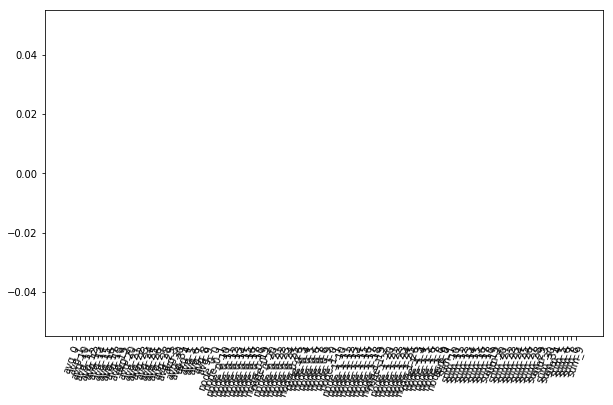

In [20]:
plt.figure(figsize=(10,6))
plt.bar(headers, ridge_clf.coef_)
plt.tick_params(axis='x', rotation=70)
plt.show()

# SVR on Graph properties

In [16]:
svr = SVR(kernel='linear', C=0.01, epsilon=0.5)
svr.fit(x_train, y_train)
prediction = svr.predict(x_test)
mse_error = mse(prediction,y_test)
mse_error, np.std(prediction)

(0.9779507420429624, 0.13001584089001797)

In [17]:
np.mean(np.square(y_test - np.mean(y_test)))

0.5948832119284566

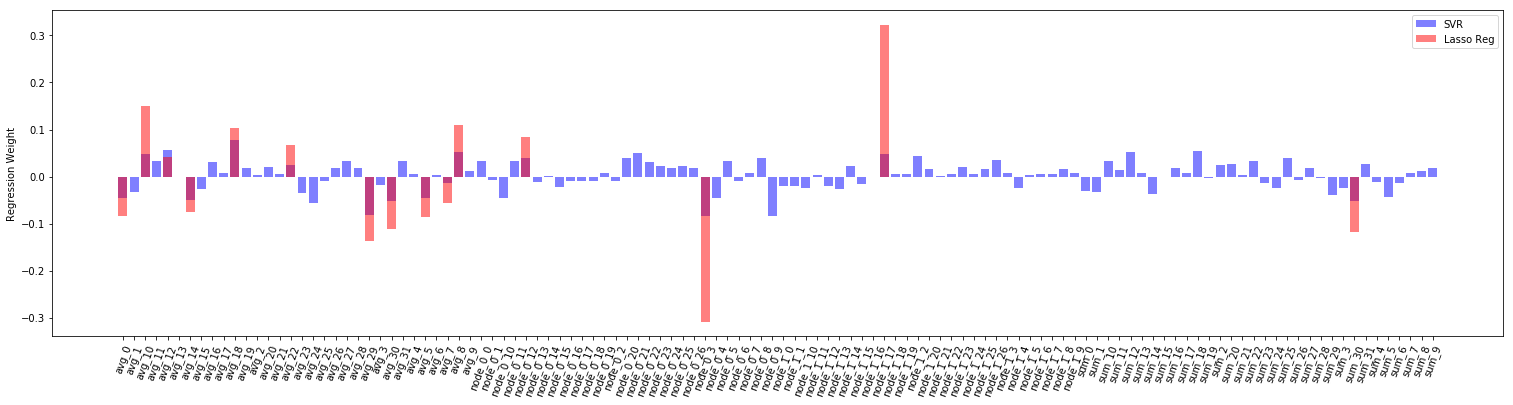

In [33]:
plt.figure(figsize=(26,6))
plt.bar(headers, svr.coef_[0], alpha = 0.5, label='SVR', color='blue')
plt.bar(headers, lasso_clf.coef_, alpha = 0.5, label='Lasso Reg', color='red')
plt.legend(loc='best')
plt.tick_params(axis='x', rotation=70)
plt.ylabel("Regression Weight")
plt.show()

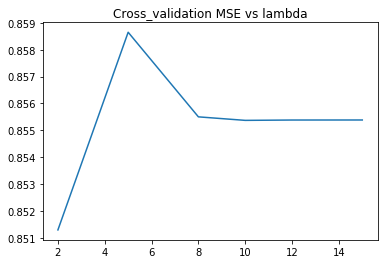

2

In [55]:
# Cross validation for SVM poly degree
degrees = [2, 5, 8, 10, 12, 15]
mse_cross_validation_accuracy = []
for deg in degrees:
    accurs = []
    for i in range(n_fold):
        test_index = range(i*samples_per_fold, (i+1)*samples_per_fold)
        train_index = range(i*samples_per_fold) + range((i+1)*samples_per_fold, n_fold*samples_per_fold)
        this_x_test = x_train[test_index]
        this_y_test = y_train[test_index]
        svr = SVR(kernel='poly', degree=deg)
        svr.fit(x_train[train_index], y_train[train_index])
        this_pred = svr.predict(x_train[test_index])
        accurs.append(mse(this_pred, y_train[test_index]))
    mse_cross_validation_accuracy.append(np.mean(accurs))
plt.plot(degrees, mse_cross_validation_accuracy)
plt.title("Cross_validation MSE vs lambda")
plt.show()
min_alpha = degrees[np.argmin(mse_cross_validation_accuracy)]
min_alpha

In [71]:
# With poly kernel
svr = SVR(kernel='poly', degree = 2, C=0.5)
svr.fit(x_train, y_train)
prediction = svr.predict(x_test)
mse_error = mse(prediction,y_test)
mse_error

0.924300096868816

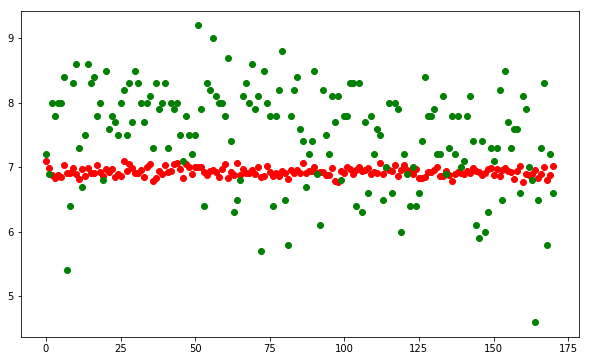

In [72]:
plt.figure(figsize=(10,6))
plt.plot(prediction, "ro")
plt.plot(y_test, "go")
plt.show()

In [78]:
# With RBF kernel
svr = SVR(kernel='rbf', C=0.1)
svr.fit(x_train, y_train)
prediction = svr.predict(x_test)
mse_error = mse(prediction,y_test)
mse_error

0.9275643261648655

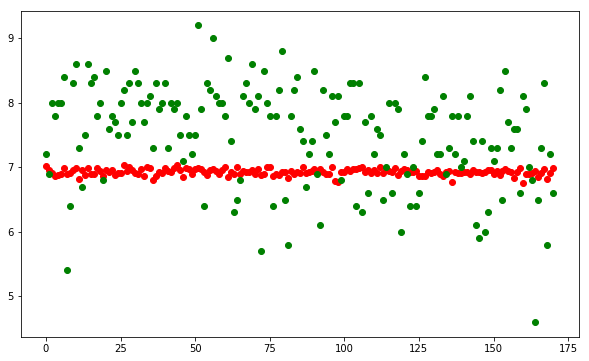

In [79]:
plt.figure(figsize=(10,6))
plt.plot(prediction, "ro")
plt.plot(y_test, "go")
plt.show()